In [3]:
from sklearn.datasets import make_classification

In [6]:
from collections import Counter

In [8]:
pip install imblearn

     |████████████████████████████████| 167 kB 784 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [12]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,n_clusters_per_class=1,weights=[0.99],random_state=11)

In [13]:
counter=Counter(y)

In [14]:
counter

Counter({0: 987, 1: 13})

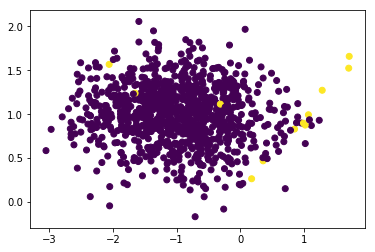

In [16]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0],X[:,1],c=y,label=str(y))
plt.show()

# Oversample

In [17]:
over=SMOTE()
X, y = over.fit_resample(X,y)

Counter({0: 987, 1: 987})


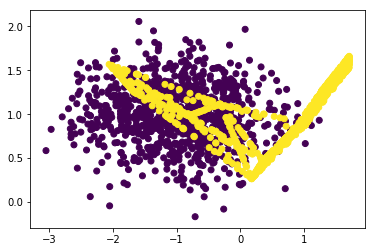

In [18]:
counter=Counter(y)
print(counter)

plt.scatter(X[:,0],X[:,1],c=y,label=str(y))
plt.show()a

Counter({0: 394, 1: 197})


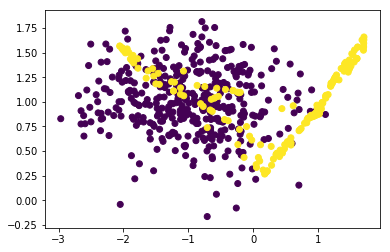

In [23]:
X, y = make_classification(n_samples=1000, n_features=2,\
                           n_redundant=0,n_clusters_per_class=1,\
                           weights=[0.99],random_state=11)

over=SMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under)]
pipe=Pipeline(steps=steps)

X, y =pipe.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0],X[:,1],c=y,label=str(y))
plt.show()

In [24]:
from imblearn.over_sampling import BorderlineSMOTE

Counter({0: 394, 1: 197})


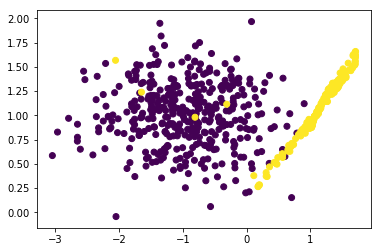

In [25]:
X, y = make_classification(n_samples=1000, n_features=2,\
                           n_redundant=0,n_clusters_per_class=1,\
                           weights=[0.99],random_state=11)

over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under)]
pipe=Pipeline(steps=steps)

X, y =pipe.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0],X[:,1],c=y,label=str(y))
plt.show()

# Classification model 

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold

Build a baseline model that I will use as a benchmark to see the increase or decrease in performance after using over and undersampling techniques 

In [29]:
model=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=1)

In [33]:
X, y = make_classification(n_samples=1000, n_features=2,\
                           n_redundant=0,n_clusters_per_class=1,\
                           weights=[0.99],random_state=11)

scores=cross_val_score(model,X,y,scoring="recall",cv=cv,n_jobs=-1)

In [35]:
import numpy as np 
print('Mean recall is',np.mean(scores))

Mean recall is 0.36666666666666664


## Model #1

In [36]:
over=SMOTE()
steps=[('o',over),('model',model)]
pipe=Pipeline(steps=steps)

scores=cross_val_score(pipe,X,y,scoring="recall",cv=cv,n_jobs=-1)

print('Mean recall is',np.mean(scores))

Mean recall is 0.5833333333333334


## Model #2

In [38]:
X, y = make_classification(n_samples=1000, n_features=2,\
                           n_redundant=0,n_clusters_per_class=1,\
                           weights=[0.99],random_state=11)

over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under),('model',model)]
pipe=Pipeline(steps=steps)

scores=cross_val_score(pipe,X,y,scoring="recall",cv=cv,n_jobs=-1)

print('Mean recall is',np.mean(scores))

Mean recall is 0.6166666666666667


But we need to validate the model. To do that, we need to split our dataset into train/test before we built our model. 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=11)

In [42]:
over=BorderlineSMOTE(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)
model=DecisionTreeClassifier()

steps=[('o',over), ('u',under),('model',model)]
pipe=Pipeline(steps=steps)
cv=RepeatedStratifiedKFold(n_splits=7,n_repeats=3,random_state=1)

scores=cross_val_score(pipe,X_train,y_train,scoring='recall',cv=cv,n_jobs=-1)
print('Mean recall is',np.mean(scores))


Mean recall is 0.5


In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('o', BorderlineSMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', DecisionTreeClassifier())])

In [45]:
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
from sklearn.metrics import recall_score, confusion_matrix

In [48]:
recall_score(y_test,pipe.predict(X_test))

0.6666666666666666

In [49]:
confusion_matrix(y_test,pipe.predict(X_test))

array([[238,   9],
       [  1,   2]])

# More complex case

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


In [52]:
X,y= make_classification(n_classes=2, n_informative=4,n_redundant=2,n_features=10,n_clusters_per_class=1,\
                        n_samples=1000, weights=[0.9,0.1], random_state=11)

In [53]:
X.shape

(1000, 10)

In [55]:
counter=Counter(y)
counter

Counter({0: 895, 1: 105})

In [57]:
pca=PCA(0.85)
over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.4)

model=KNeighborsClassifier()

pipe=Pipeline([('o',over), ('u',under),('pca',pca),('model',model)])

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=11)

Build a baseline model

In [58]:
baseline=KNeighborsClassifier()

baseline.fit(X_train,y_train)

recall_score(y_test,baseline.predict(X_test))

0.8461538461538461

In [59]:
confusion_matrix(y_test,baseline.predict(X_test))

array([[224,   0],
       [  4,  22]])

testing our pipe

In [60]:
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

In [61]:
recall_score(y_test,y_pred)

0.8076923076923077

In [62]:
confusion_matrix(y_test,pipe.predict(X_test))

array([[224,   0],
       [  5,  21]])

# Really complex case (test)

In [64]:
X,y= make_classification(n_classes=2, n_informative=4,n_redundant=2,n_features=10,n_clusters_per_class=1,\
                        n_samples=1000, weights=[0.9,0.1], random_state=11)

In [65]:
Counter(y)

Counter({0: 895, 1: 105})

In [75]:
model=KNeighborsClassifier(n_jobs=-1)
over=BorderlineSMOTE(sampling_strategy=0.2,k_neighbors=6)
under=RandomUnderSampler(sampling_strategy=0.5)
pca=PCA()

pipe=Pipeline([('o',over), ('u',under),('pca',pca),('model',model)])

In [76]:
params={'n_neighbors':range(3,10,2),
       'weights':['uniform','distance'],
       'leaf_size':[30,45],
       'p':[1,2,3]}

In [77]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='recall', cv=cv)

In [80]:
pipe=Pipeline([('o',over), ('u',under),('pca',pca),('model',grid_search)])

In [81]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('o', BorderlineSMOTE(k_neighbors=6, sampling_strategy=0.2)),
                ('u', RandomUnderSampler(sampling_strategy=0.5)),
                ('pca', PCA()),
                ('model',
                 GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
                              estimator=KNeighborsClassifier(n_jobs=-1),
                              n_jobs=-1,
                              param_grid={'leaf_size': [30, 45],
                                          'n_neighbors': range(3, 10, 2),
                                          'p': [1, 2, 3],
                                          'weights': ['uniform', 'distance']},
                              scoring='recall'))])

In [84]:
pipe['model'].best_score_

0.9774725274725274

In [85]:
pipe['model'].best_params_

{'leaf_size': 30, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

In [86]:
pipe['pca'].explained_variance_ratio_.round(2)

array([0.54, 0.12, 0.08, 0.07, 0.06, 0.05, 0.05, 0.04, 0.  , 0.  ])

In [87]:
import pickle

In [88]:
pickle.dump(pipe, open('mymodel.sav','wb'))

In [89]:
np.savetxt('X_test.csv',X_test,delimiter=',')
np.savetxt('y_test.csv',y_test,delimiter=',')